# CROP RECOMMENDATION SYSTEM 

![](https://images.unsplash.com/photo-1560493676-04071c5f467b?ixid=MXwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHw%3D&ixlib=rb-1.2.1&auto=format&fit=crop&w=968&q=80)

# Goal 🎯
**To recommend optimum crops to be cultivated by farmers based on several parameters and help them make an informed decision before cultivation**

# About the data

The data used in this project is made by augmenting and combining various publicly available datasets of India like weather, soil, etc. You can access the dataset [here](https://www.kaggle.com/atharvaingle/crop-recommendation-dataset). This data is relatively simple with very few but useful features unlike the complicated features affecting the yield of the crop.

The data have Nitrogen, Phosphorous, Pottasium and pH values of the soil. Also, it also contains the humidity, temperature and rainfall required for a particular crop. 

### **So, without further ado, Let's dive in and code ...**

In [38]:
# Importing libraries

from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [39]:
PATH = '../input/crop-recommendation-dataset/Crop_recommendation.csv'
df = pd.read_csv(PATH)

In [40]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [41]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [42]:
df.size

17600

In [43]:
df.shape

(2200, 8)

In [44]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [45]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [46]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [47]:
df['label'].value_counts()

pigeonpeas     100
muskmelon      100
cotton         100
papaya         100
grapes         100
lentil         100
coffee         100
kidneybeans    100
maize          100
banana         100
jute           100
apple          100
pomegranate    100
mango          100
mungbean       100
watermelon     100
mothbeans      100
blackgram      100
chickpea       100
coconut        100
orange         100
rice           100
Name: label, dtype: int64

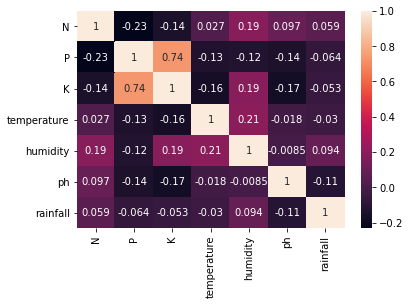

In [48]:
sns.heatmap(df.corr(),annot=True)

### Seperating features and target label

In [49]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph']]
target = df['label']
labels = df['label']

In [50]:
# Initializing empty lists to append all model's name and corresponding name
acc = []
model = []

In [51]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

# Decision Tree

In [52]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  80.0
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.36      1.00      0.53        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.33      0.07      0.12        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.00      0.00      0.00        23
       maize       1.00      1.00      1.00        21
       mango       0.47      1.00      0.64        26
   mothbeans       1.00      0.16      0.27        19
    mungbean       0.96      1.00      0.98        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00   

In [53]:
from sklearn.model_selection import cross_val_score

In [54]:
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, features, target,cv=5)

In [55]:
score

array([0.89545455, 0.87045455, 0.86590909, 0.83181818, 0.87272727])

### Saving trained Decision Tree model

In [56]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
DT_pkl_filename = 'DecisionTree.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

# Guassian Naive Bayes

In [57]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.9659090909090909
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.81      0.81      0.81        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.96      0.82      0.88        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.87      0.87      0.87        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.89      0.94        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      0.96      0.98        23
      orange       1.00      1.00 

In [58]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([0.95909091, 0.96590909, 0.96363636, 0.96590909, 0.96363636])

### Saving trained Guassian Naive Bayes model

In [59]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
NB_pkl_filename = 'NBClassifier.pkl'
# Open the file to save as pkl file
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)
# Close the pickle instances
NB_Model_pkl.close()

# Support Vector Machine (SVM)

In [60]:
from sklearn.svm import SVC

SVM = SVC(gamma='auto')

SVM.fit(Xtrain,Ytrain)

predicted_values = SVM.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.31363636363636366
              precision    recall  f1-score   support

       apple       1.00      0.62      0.76        13
      banana       1.00      0.47      0.64        17
   blackgram       0.67      0.38      0.48        16
    chickpea       1.00      0.24      0.38        21
     coconut       1.00      0.33      0.50        21
      coffee       1.00      0.23      0.37        22
      cotton       1.00      0.50      0.67        20
      grapes       1.00      0.22      0.36        18
        jute       1.00      0.25      0.40        28
 kidneybeans       0.05      1.00      0.09        14
      lentil       0.75      0.13      0.22        23
       maize       1.00      0.10      0.17        21
       mango       1.00      0.15      0.27        26
   mothbeans       1.00      0.21      0.35        19
    mungbean       1.00      0.21      0.34        24
   muskmelon       0.92      0.52      0.67        23
      orange       1.00      0.10      0.

In [61]:
# Cross validation score (SVM)
score = cross_val_score(SVM,features,target,cv=5)
score

array([0.48863636, 0.44772727, 0.44090909, 0.475     , 0.475     ])

# Logistic Regression

In [62]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.8886363636363637
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.59      0.62      0.61        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.95      1.00      0.98        20
      grapes       1.00      1.00      1.00        18
        jute       0.78      0.50      0.61        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.81      0.74      0.77        23
       maize       0.95      0.95      0.95        21
       mango       1.00      1.00      1.00        26
   mothbeans       0.70      0.84      0.76        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       0.86      0.78      0.82        23
      orange       1.00   

In [63]:
# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg,features,target,cv=5)
score

array([0.88181818, 0.87954545, 0.90454545, 0.89318182, 0.87727273])

### Saving trained Logistic Regression model

In [64]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
LR_pkl_filename = 'LogisticRegression.pkl'
# Open the file to save as pkl file
LR_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(LogReg, LR_Model_pkl)
# Close the pickle instances
LR_Model_pkl.close()

# Random Forest

In [65]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.9659090909090909
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.78      0.88      0.82        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.96      0.82      0.88        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.90      0.83      0.86        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       0.94      0.89      0.92        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00

In [66]:
# Cross validation score (Random Forest)
score = cross_val_score(RF,features,target,cv=5)
score

array([0.96590909, 0.97727273, 0.96136364, 0.95454545, 0.96363636])

### Saving trained Random Forest model

In [67]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
RF_pkl_filename = 'RandomForest.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

In [79]:
pip install onnx skl2onnx

     |████████████████████████████████| 300 kB 9.6 MB/s eta 0:00:01
     |████████████████████████████████| 298 kB 46.3 MB/s eta 0:00:01
     |████████████████████████████████| 298 kB 40.0 MB/s eta 0:00:01
     |████████████████████████████████| 83 kB 1.6 MB/s  eta 0:00:01
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [80]:
import onnx
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType

# --- Conversion to ONNX ---

# 1. Define the input shape/type
# ONNX needs to know the shape and type of the input data.
# The second element in the tuple, [None, Xtrain.shape[1]], defines the shape:
# - 'None' means the batch size can vary.
# - 'Xtrain.shape[1]' is the number of input features (columns) in your dataset.
initial_type = [('float_input', FloatTensorType([None, Xtrain.shape[1]]))]

# 2. Convert the Scikit-learn model (RF) to ONNX format
onx = convert_sklearn(
    RF,
    initial_types=initial_type,
    target_opset=13  # A common and stable ONNX Operator Set version
)

# 3. Save the ONNX model to a file
onnx_filename = "RandomForest.onnx"
with open(onnx_filename, "wb") as f:
    f.write(onx.SerializeToString())

print(f"Successfully converted and saved the model to {onnx_filename}")

Successfully converted and saved the model to RandomForest.onnx


# XGBoost

In [68]:
import xgboost as xgb
XB = xgb.XGBClassifier()
XB.fit(Xtrain,Ytrain)

predicted_values = XB.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('XGBoost')
print("XGBoost's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

XGBoost's Accuracy is:  0.9613636363636363
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.82      0.88      0.85        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       0.96      1.00      0.98        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.86      0.89      0.88        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.90      0.83      0.86        23
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        26
   mothbeans       0.94      0.89      0.92        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00     

In [69]:
# Cross validation score (XGBoost)
score = cross_val_score(XB,features,target,cv=5)
score

array([0.97045455, 0.96363636, 0.96136364, 0.96590909, 0.96590909])

### Saving trained XGBoost model

In [70]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
XB_pkl_filename = 'XGBoost.pkl'
# Open the file to save as pkl file
XB_Model_pkl = open(XB_pkl_filename, 'wb')
pickle.dump(XB, XB_Model_pkl)
# Close the pickle instances
XB_Model_pkl.close()

## Accuracy Comparison

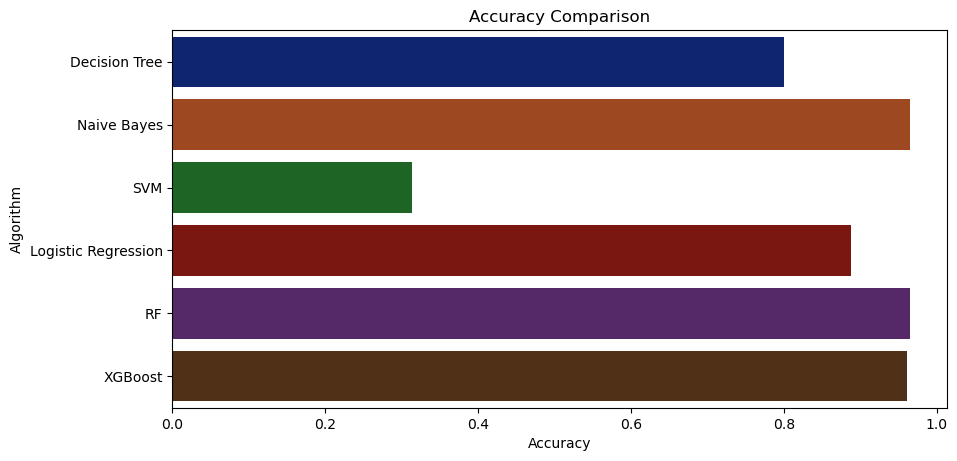

In [71]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [72]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 0.8
Naive Bayes --> 0.9659090909090909
SVM --> 0.31363636363636366
Logistic Regression --> 0.8886363636363637
RF --> 0.9659090909090909
XGBoost --> 0.9613636363636363


## Making a prediction

In [78]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7]])
prediction = RF.predict(data)
print(prediction)

['coffee']


In [77]:
data = np.array([[83, 45, 60, 28, 70.3, 7.0]])
prediction = RF.predict(data)
print(prediction)

['jute']


## So here comes the fun part 😄

I have also made a web application for this and deployed it in cloud. You can view it [here](https://harvestify.herokuapp.com/).

I have also combined a fertilizer recommendation system and a disease detection system in this project.
You can check my kernel of disease detection using ResNet [here](https://www.kaggle.com/atharvaingle/plant-disease-classification-resnet-99-2)

Also, I have made the project open source. So, feel free to suggest more improvements and submit a pull request.

### Github links:
- [Full project - [Harvestify]](https://github.com/Gladiator07/Harvestify) - has all the data and notebooks used for developing the application
- [Deployed project](https://harvestify.herokuapp.com/) - only has the code of deployed application

*PS: Ignore my frontend skills :)*

Thanks for sticking till the end

Hope you enjoyed this notebook :)

Show your appreciation by a upvote ...

Happy learning !!

Catch you guys on the next one

Peace ✌️